## Step 1: Load the data

In [384]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = "../data_set.csv"
df = pd.read_csv(path)
# Input Zero where 'revenue' = NaN
df.loc[df['revenue'].isnull(), 'revenue'] = 0
df.head()

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,$0
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,$0
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,$0
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,$0
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,$0


## Step 2: Questions

### Question 1

77891 leads are present in the dataset, 37079 are assigned (47.6% of total), 40812 are unassigned (52.4%). Only 4.2% of assigned  and 4.3% of unassigned leads have revenue data. 

The dataset contains empty cells in 96% of all reveneue cells. 
Thus, I decided to perform the analysis under 2 different interpretation of the empty revenue cells: 
 * Assumption 1: Empty cells represent unkown value (lost data). The rows without revenue values were excluded from the calculations (Assumption 1: Named XX_1)
 * Assumption 2: Empty cells represent a known value of no revenue (zero dollars). The rows without revenue values were included in the analysis and assumed to have zero revenue. (Assumption 2: Named XX_2)
 
##### Assigned = A, Unassigned = U

In [341]:
df_assigned = df['revenue'][df['assigned'] == 1]
df_unassigned = df['revenue'][df['assigned'] == 0]
number_leads = df['advertiser_id'].nunique()

number_leads, df_assigned.count(), df_unassigned.count(), df_assigned.count()/number_leads*100, df_unassigned.count()/number_leads*100,\
rev_not0.count()/df_assigned.count()*100, rev_0.count()/df_unassigned.count()*100

(77891,
 37079,
 40812,
 47.603702610057645,
 52.396297389942362,
 4.2207179265891748,
 4.3492110163677351)

#### Assumption 1

Columns A & B (in the table below): Assigned average revenue is \$77M. Unassigned average revenue is \$24M.

#### Assumption 2

Columns C & D (in the table below): Assigned average revenue is \$3M. Unassigned average revenue is \$1M.

####  Thus, it's important to decide how to treat no-values in the revenue cells, since it will influce our business decision regarding the importance of the lead assignement to a salesperson. The zero revenue skews the statitstics to the zero.

,A.Assgnd_no0,B.Unassgnd_no0,C.Assgnd,D.Unassgnd
mean,"$76,736,861","$23,889,416","$3,238,846","$1,039,001"
std,"$186,367,787","$157,641,653","$41,269,092","$33,226,156"
min,"$12,000","$13,000",$0,$0
25%,"$8,060,268","$5,653,500",$0,$0
50%,"$23,180,091","$12,353,345",$0,$0
75%,"$58,548,372","$24,672,040",$0,$0
max,"$2,500,000,000","$6,533,791,000","$2,500,000,000","$6,533,791,000"


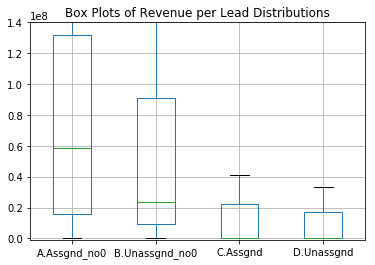

In [365]:
rev_no0_as = df['revenue'][df['revenue'] != 0][df['assigned'] == 1]
rev_no0_unas = df['revenue'][df['revenue'] != 0][df['assigned'] == 0] 

a = rev_no0_as.describe()
b = rev_no0_unas.describe()
c = df_assigned.describe()
d = df_unassigned.describe()
pd.options.display.float_format = '${:,.0f}'.format
plot = pd.DataFrame({'A.Assgnd_no0': a, 'B.Unassgnd_no0': b,'C.Assgnd' : c, 'D.Unassgnd': d})
plot = plot.drop(['count'])

plot.boxplot()
axes = plt.gca()
axes.set_ylim([-1000000,140000000])
plt.title('Box Plots of Revenue per Lead Distributions')
plot

#### Histogram of the revenue data

The regular scale for revenue histogram proved to be ineffected due to a wide spread in data and extreme skewness to zero. Thus the log scale was used to plot assigned & unassigned revenues, zero revenue was excluded. The distribution appears to be normal on the log scale, so log-normal on a regular (linear) scale.

Text(0.5,0,'Revenue per Account (in Dollars)')

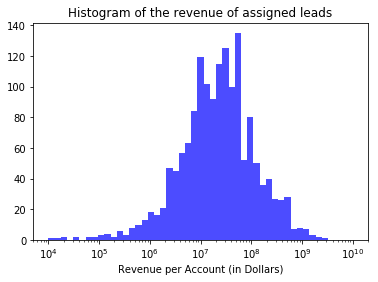

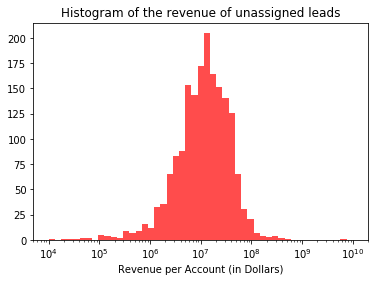

In [382]:
plt.hist(rev_no0_as, bins=np.logspace(np.log10(10000),np.log10(10000000000), 50), facecolor='blue', alpha=0.7, rwidth = 1)
plt.gca().set_xscale("log")
plt.title('Histogram of the revenue of assigned leads')
plt.xlabel('Revenue per Account (in Dollars)')
plt.figure()
plt.hist(rev_no0_unas, bins=np.logspace(np.log10(10000),np.log10(10000000000), 50), facecolor='red', alpha=0.7, rwidth = 1)
plt.gca().set_xscale("log")
plt.title('Histogram of the revenue of unassigned leads')
plt.xlabel('Revenue per Account (in Dollars)')

### Question 2: Metrics for finding the incremental value of assigning a lead to the sales team

The most important metrics used to estimate the incremental impact the sales representatives had on revenue are:
 * Revenue: in order to know how the revenue was impacted, the revenue from assigned/unassigned advertiser needs to be compared.
 * Account Age: Time length of the account can be correlated with revenue, either because of the established partnership with the account holder or just more time available to get the revenue. 
 * Assignemnet Age: How much time the sales representative had to work with the account could reflect the established relationship or a problematic account.
 * Skill of the sales representatives: not given here, but the soft/business skills of the advertiser can be reflected in higher revenues.

### Question 3_Assumption 1: Relationship between account age and revenue.

####  Disrgeard the Revenue, where no revenue value is provided

Note: Assigned = A, Unassigned = U

Average revenue for different account ages (on one-year granularity) is plotted below. 

Text(0.5,1,'Average revenue for different account ages')

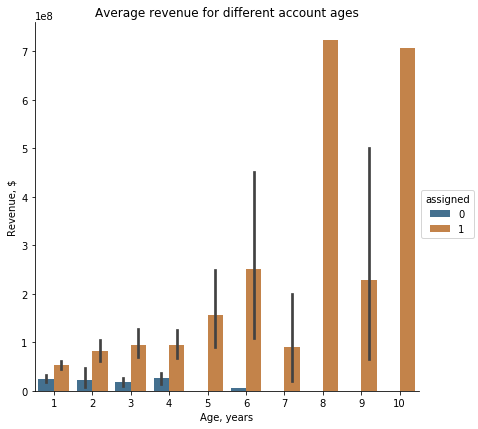

In [366]:
df_assumption1 = df[df['revenue'] > 0].copy()
df_assumption1['age_groups'] = pd.cut(df_assumption1['age'], bins = np.arange(-28,3987,365))
g = sns.factorplot(data = df_assumption1, x = 'age_groups', y = 'revenue', hue="assigned", saturation=.5,\
               kind="bar", ci=95, aspect=1, size = 6)
g.set_axis_labels("Age, years", "Revenue, $").set_xticklabels(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.title('Average revenue for different account ages')

#### Data for the plot above is shown below. 

In [367]:
age_groups_A1 = df_assumption1[df_assumption1['assigned'] == 1].groupby(by = 'age_groups')['revenue']
age_groups_U1 = df_assumption1[df_assumption1['assigned'] == 0].groupby(by = 'age_groups')['revenue']

a1 = age_groups_A1.mean() 
b1 = age_groups_A1.count()
c1 = age_groups_U1.mean()
d1 = age_groups_U1.count()

data = pd.DataFrame({'A.Average_Revenue_assigned': a1, 'B.Count': b1,'C.Average_Revenue_unassigned' : c1, 'D.Count': d1})
data

,A.Average_Revenue_assigned,B.Count,C.Average_Revenue_unassigned,D.Count
age_groups,,,,
"(-28, 337]","$53,541,996",813,"$23,957,964",1731
"(337, 702]","$81,286,024",306,"$23,264,182",15
"(702, 1067]","$95,096,287",224,"$18,230,699",19
"(1067, 1432]","$93,799,315",121,"$25,794,333",9
"(1432, 1797]","$156,384,999",71,$nan,0
"(1797, 2162]","$252,205,724",22,"$4,983,000",1
"(2162, 2527]","$89,940,333",3,$nan,0
"(2527, 2892]","$723,566,000",1,$nan,0
"(2892, 3257]","$228,796,000",3,$nan,0


### Question 4_Assumption 1: Incremental value of assigning a lead to the sales team

#### Disrgeard Revenue, where no revenue value is provided

#### Significance test of the incremental value for assigning a lead to the sales team

The table below shows the Z-test calculatiuons for the 95% confidence interval for the difference in the revenue mean of assigned and unassinged leads for every year. The significance test showed that with 95% confidence, the revenue difference between asssigned and unassigned leads for: 
 * Account age under 1 year: from \$18.2M to \$40.9M
 * Account age between 1 and 2 years: from \$25.9M to \$90.2M
 * Account age between 2 ans 3 years: from \$47.1M to \$106.6M 
 * Account age between 3 and 4 years: from \$35.5M to \$100.5M (only 9 unassigned samples, so these values should be taken with a grain of salt)
 
Note that for the analysis of the incremental value, we can only use the first 4 rows because only these rows have enough leads to see statistical results.

Note: Age<0 was also included in the calculations (it doesn't seem to affect the outcome, probably the age was input by mistake). This way all the data is preserved in the calculations.

### Conclusion_Assumption 1: All intervals are above zero, thus we can say with 95% confidence that for accounts with ages between 1 and 4 years the incremental value for assigning a lead will be positive & in the range found in this analysis.

In [377]:
avg_A_Dlrs1 = age_groups_A1.mean()
avg_U_Dlrs1 = age_groups_U1.mean()

Conf_table1 = pd.DataFrame({'Avg_A_Dlrs': avg_A_Dlrs1, 'Avg_U_Dlrs': avg_U_Dlrs1})

Conf_table1['Difference_Dlrs'] = Conf_table1['Avg_A_Dlrs'] - Conf_table1['Avg_U_Dlrs']

Conf_table1['Count_A'] = age_groups_A1.count()
Conf_table1['Count_U'] = age_groups_U1.count()
Variance_A = age_groups_A1.var()
Variance_U = age_groups_U1.var()
st_dev = (Variance_A/Conf_table1['Count_A']+ Variance_U/Conf_table1['Count_U'])
Conf_table1['St_dev_sampling_distr'] = np.sqrt(st_dev)

Conf_table1['Conf_interval_from'] = Conf_table1['Difference_Dlrs'] - 1.96 * Conf_table1['St_dev_sampling_distr']
Conf_table1['Conf_interval_to'] = Conf_table1['Difference_Dlrs'] + 1.96 * Conf_table1['St_dev_sampling_distr']

Conf_table1

,Avg_A_Dlrs,Avg_U_Dlrs,Difference_Dlrs,Count_A,Count_U,St_dev_sampling_distr,Conf_interval_from,Conf_interval_to
age_groups,,,,,,,,
"(-28, 337]","$53,541,996","$23,957,964","$29,584,032",813,1731,"$5,799,476","$18,217,060","$40,951,004"
"(337, 702]","$81,286,024","$23,264,182","$58,021,842",306,15,"$16,376,441","$25,924,017","$90,119,667"
"(702, 1067]","$95,096,287","$18,230,699","$76,865,588",224,19,"$15,189,494","$47,094,179","$106,636,997"
"(1067, 1432]","$93,799,315","$25,794,333","$68,004,982",121,9,"$16,557,697","$35,551,895","$100,458,069"
"(1432, 1797]","$156,384,999",$nan,$nan,71,0,$nan,$nan,$nan
"(1797, 2162]","$252,205,724","$4,983,000","$247,222,724",22,1,$nan,$nan,$nan
"(2162, 2527]","$89,940,333",$nan,$nan,3,0,$nan,$nan,$nan
"(2527, 2892]","$723,566,000",$nan,$nan,1,0,$nan,$nan,$nan
"(2892, 3257]","$228,796,000",$nan,$nan,3,0,$nan,$nan,$nan


### Question 3_Assumption 2: Revenue = 0, where no revenue value is provided

Text(0.5,1,'Average revenue for different account ages')

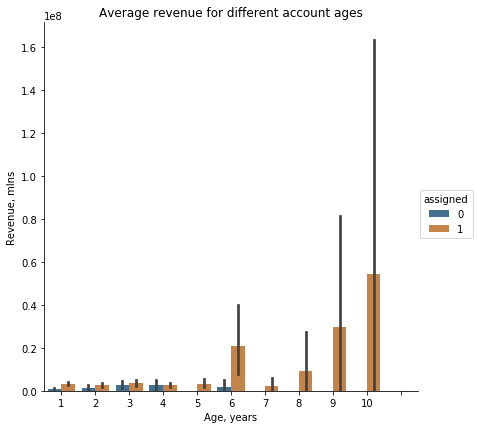

In [376]:
df_assumption2 = df.copy()
df_assumption2['age_groups'] = pd.cut(df_assumption2['age'], bins = np.arange(-28,4000,365))
g = sns.factorplot(data = df_assumption2, x = 'age_groups', y = 'revenue', hue="assigned", saturation=.5,\
               kind="bar", ci=95, aspect=1, size = 6)
g.set_axis_labels("Age, years", "Revenue, mlns").set_xticklabels(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.title('Average revenue for different account ages')

#### Data for the plot above is shown below. 

In [370]:
age_groups_A2 = df_assumption2[df_assumption2['assigned'] == 1].groupby(by = 'age_groups')['revenue']
age_groups_U2 = df_assumption2[df_assumption2['assigned'] == 0].groupby(by = 'age_groups')['revenue']

a2 = age_groups_A2.mean()
b2 = age_groups_A2.count()
c2 = age_groups_U2.mean()
d2 = age_groups_U2.count()

data_2 = pd.DataFrame({'A.Average_Revenue_assigned': a2, 'B.Count': b2,'C.Average_Revenue_unassigned' : c2, 'D.Count': d2})
data_2

,A.Average_Revenue_assigned,B.Count,C.Average_Revenue_unassigned,D.Count
age_groups,,,,
"(-28, 337]","$3,304,961",13171,"$1,029,037",40301
"(337, 702]","$2,580,509",9639,"$1,292,455",270
"(702, 1067]","$3,461,418",6154,"$2,749,074",126
"(1067, 1432]","$2,721,755",4170,"$2,763,679",84
"(1432, 1797]","$3,239,958",3427,$0,22
"(1797, 2162]","$20,626,490",269,"$1,661,000",3
"(2162, 2527]","$2,193,667",123,$0,1
"(2527, 2892]","$9,044,575",80,$0,4
"(2892, 3257]","$29,842,957",23,$0,1


### Question 4_Assumption 2: Incremental value of assigning a lead to the sales team

#### Revenue = 0, where no revenue value is provided

#### Significance test of the incremental value for assigning a lead to the sales team

The table below shows the Z-test calculatiuons for the 95% confidence interval for the difference in the revenue mean of assigned and unassinged leads for every year. The significance test showed that with 95% confidence, the revenue difference betweem asssigned and unassigned leads for:
 * Year 1: from \$1.6M to \$2.9M 
 * Year 2: from -\$0.28M to \$2.9M
 * Year 3: from -\$1.3M to \$2.8M 
 * Year 4: from -\$2.4M to \$2.3M 
 * Year 5: from \$1.4M to \$5.0M
 * Year 7: not enough unassigned samples for stat.sig. analysis (4)
 
 Note that for the analysis of the incremental value, we can only use the first 4 rows because only these rows have enough leads to see statistical results.

Note: Age<0 was also included in the calculations (it doesn't seem to affect the outcome, probably the age was input by mistake). This way all the data is preserved in the calculations.

### Conclusion_Assumption 2: Unfortunatelly, three intervals include zero, thus we can't say with 95% confidence that for ages between 1 and 4 years the incremental value for assigning a lead will be positive. Only 1 year and 5 years old accounts show positive incremental values. 

In [378]:
avg_A_Dlrs2 = age_groups_A2.mean()
avg_U_Dlrs2 = age_groups_U2.mean()

Conf_table2 = pd.DataFrame({'Avg_A_Dlrs': avg_A_Dlrs2, 'Avg_U_Dlrs': avg_U_Dlrs2})

Conf_table2['Difference_Dlrs'] = Conf_table2['Avg_A_Dlrs'] - Conf_table2['Avg_U_Dlrs']
Conf_table2['Count_A'] = age_groups_A2.count()
Conf_table2['Count_U'] = age_groups_U2.count()
Variance_A = age_groups_A2.var()
Variance_U = age_groups_U2.var()
st_dev = (Variance_A/Conf_table2['Count_A']+ Variance_U/Conf_table2['Count_U'])
Conf_table2['St_dev_sampling_distr'] = np.sqrt(st_dev)
Conf_table2['Conf_interval_from'] = Conf_table2['Difference_Dlrs'] - 1.96 * Conf_table2['St_dev_sampling_distr']
Conf_table2['Conf_interval_to'] = Conf_table2['Difference_Dlrs'] + 1.96 * Conf_table2['St_dev_sampling_distr']

Conf_table2

,Avg_A_Dlrs,Avg_U_Dlrs,Difference_Dlrs,Count_A,Count_U,St_dev_sampling_distr,Conf_interval_from,Conf_interval_to
age_groups,,,,,,,,
"(-28, 337]","$3,304,961","$1,029,037","$2,275,924",13171,40301,"$335,167","$1,618,996","$2,932,851"
"(337, 702]","$2,580,509","$1,292,455","$1,288,054",9639,270,"$798,788","$-277,571","$2,853,679"
"(702, 1067]","$3,461,418","$2,749,074","$712,345",6154,126,"$1,041,574","$-1,329,141","$2,753,831"
"(1067, 1432]","$2,721,755","$2,763,679","$-41,924",4170,84,"$1,200,151","$-2,394,220","$2,310,372"
"(1432, 1797]","$3,239,958",$0,"$3,239,958",3427,22,"$932,646","$1,411,971","$5,067,944"
"(1797, 2162]","$20,626,490","$1,661,000","$18,965,490",269,3,"$8,392,425","$2,516,338","$35,414,643"
"(2162, 2527]","$2,193,667",$0,"$2,193,667",123,1,$nan,$nan,$nan
"(2527, 2892]","$9,044,575",$0,"$9,044,575",80,4,"$9,044,575","$-8,682,792","$26,771,942"
"(2892, 3257]","$29,842,957",$0,"$29,842,957",23,1,$nan,$nan,$nan


### Question 5: Interesting findings

Assignement days: Seems the data was input incorrectly, 88% of data shows 130-139 days of assignment for the UNASSIGNED leads (shouldn't be listed as assigned), while 78% of data shows 130-139 days of assignment for the assigned leads.

Age of account: The data seems strange, 94.7% of unassigned & 20% of unassigned accounts age equals to zero. 


### Histogram of Account Age and Assignement Days

Text(0.5,1,'Histogram of the Assignement Days')

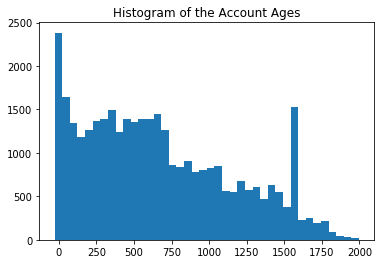

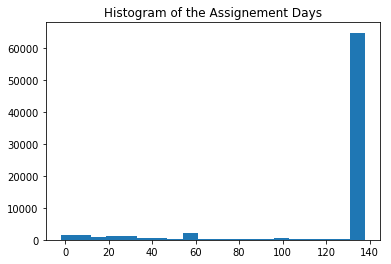

In [381]:
plt.hist(df['age'][df['age']!= 0][df['age']<2000], bins=40)
plt.title('Histogram of the Account Ages')
plt.figure()
plt.hist(df['assign_days'][df['assign_days']!= 0][df['assign_days']< 139], bins=20)
plt.title('Histogram of the Assignement Days')

### Excel plots to duble-check the results

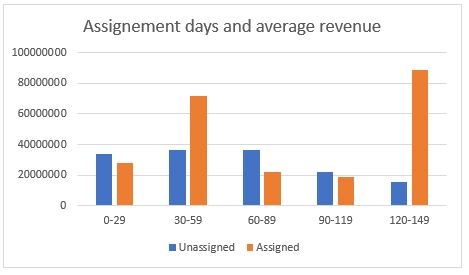

In [385]:
from IPython.display import Image
Image(filename='../Indeed/pics/Capture.jpg') 

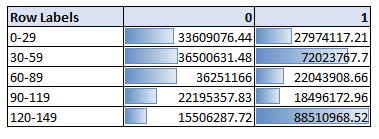

In [338]:
Image(filename='../Indeed/pics/Capture2.jpg') 

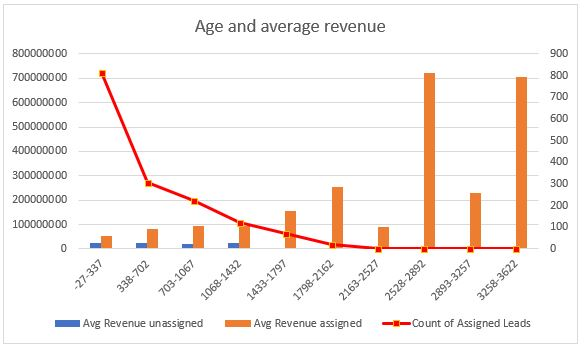

In [386]:
Image(filename='../Indeed/pics/Capture3.jpg') 

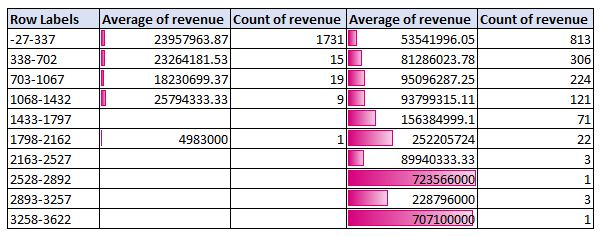

In [340]:
Image(filename='../Indeed/pics/Capture4.jpg') 